The Lowest Vibration Energy at 3 significant digits:
Ground State Energy: -0.155+0.000j eV
1st Excited State Energy: -0.143+0.000j eV
2nd Excited State Energy: -0.139+0.000j eV


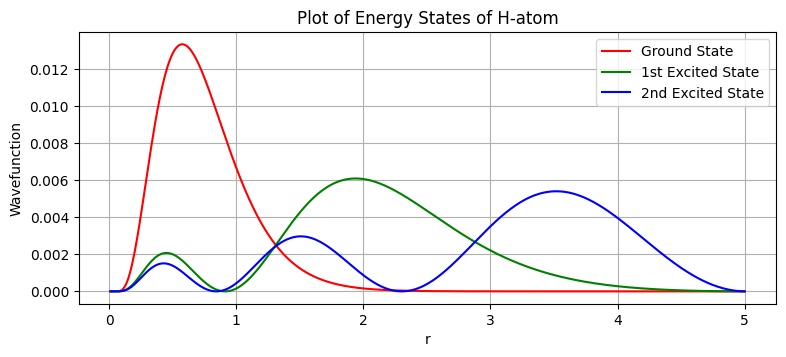

In [7]:
#Practicle No - 3
import numpy as np
from scipy import constants as const
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

h = 1973
m = 940e6
rmin = 0.01
rmax = 5
n = 500
D = 0.755501
a = 1.44
ro = 0.131349
r = np.linspace(rmin, rmax, n)
d = r[1] - r[0]

V = np.zeros((n, n))
for i in range(n):
    rd = (r[i] - ro) / r[i]
    V[i, i] = D * (np.exp(-2*a*rd) - np.exp(-a*rd))

# Kinetic Energy
K = np.zeros((n, n))
np.fill_diagonal(K, -2)  # Main diagonal with -2
np.fill_diagonal(K[1:], 1)  # Upper diagonal (offset by +1) with 1
np.fill_diagonal(K[:, 1:], 1)  # Lower diagonal (offset by +1) with 1

# Hamiltonian
H = -(h**2 / (2 * m * d**2)) * K + V
eigenvalues, eigenvectors = eigs(H, k=4, which='SR')

indx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[indx]
eigenvectors = eigenvectors[:, indx]

print('The Lowest Vibration Energy at 3 significant digits:')
print(f'Ground State Energy: {eigenvalues[0]:.3f} eV')
print(f'1st Excited State Energy: {eigenvalues[1]:.3f} eV')
print(f'2nd Excited State Energy: {eigenvalues[2]:.3f} eV')

plt.figure(figsize=(9, 12))

plt.subplot(3, 1, 1)
plt.plot(r, np.abs(eigenvectors[:, 0])**2, "r", label='Ground State')
plt.plot(r, np.abs(eigenvectors[:, 1])**2, "g", label='1st Excited State')
plt.plot(r, np.abs(eigenvectors[:, 2])**2, "b", label='2nd Excited State')
plt.title("Plot of Energy States of H-atom")
plt.xlabel('r')
plt.ylabel('Wavefunction')
plt.grid(True)
plt.legend()
plt.show()